In [2]:
import os
import time
import sys
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.spatial import KDTree, cKDTree
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from concorde.tsp import TSPSolver
from math import sqrt, ceil, inf, floor

In [3]:
root_dir = os.getcwd()
tsp_dir = os.path.join(root_dir, "../tsplib")
concorde_dir = os.path.join(root_dir, "../pyconcorde/concorde")

In [99]:
sys.path.insert(0, root_dir)
sys.path.insert(0, tsp_dir)
#sys.path.insert(0, concorde_dir)

In [100]:
num_samples = 10000

In [101]:
def gen_tsp_data():
    ## Load a tsp library and Create a dictionary "tsp_database" of Name-X/Y coordinates.

    tsp_database = {}
    cities = os.listdir(tsp_dir)
    
    for city in cities:
        if city.endswith(".tsp"):
            with open(tsp_dir + '/' + city, 'r') as infile:
                lines = infile.readlines()
                for i in range(0, len(lines)):
                    line = lines[i]
                    if "DIMENSION" in line:
                        Dimension = line.strip().split(':')[1]
                        if not Dimension.isdigit():
                            continue
                    if "EDGE_WEIGHT_TYPE" in line:
                        EdgeWeightType = line.strip().split()[1]
                        if EdgeWeightType != "EUC_2D":
                            continue
                    if "NODE_COORD_SECTION" in line:
                        x_y = None
                        nodelist_x = []
                        nodelist_y = []
        
                        for j in range (1, int(Dimension)):
                            x_y = lines[i+1].strip().split()[1:]
    #                        print(x_y)
    #                        import pdb; pdb.set_trace()
                            x = x_y[0]
                            y = x_y[1]
                            nodelist_x.append(float(x))
                            nodelist_y.append(float(y))
                            i+=1
                        tsp_database.update({city[:-4]:[nodelist_x, nodelist_y]})
    return tsp_database    

In [102]:
tsp_database = gen_tsp_data()
problem_list = tsp_database.keys()
problem_list

dict_keys(['pr107', 'pr152', 'pr226', 'pr1002', 'rat575', 'kroA100', 'eil101'])

Problem : pr1002


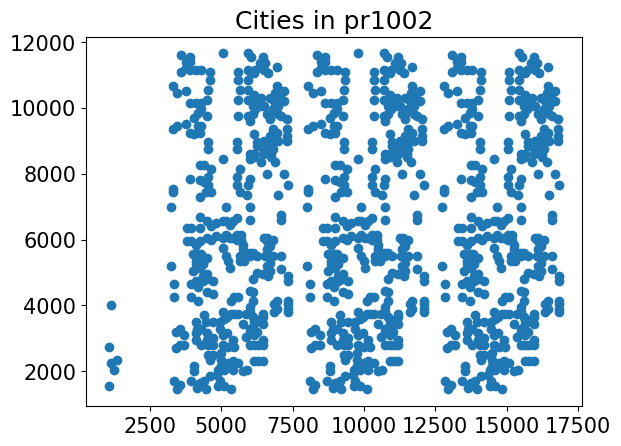

In [103]:
import pyproj as p
#x = "kroA100"
#x = "rat575"
#x = "eil101"
#x = "pr107"
#x = "pr152"
x = "pr1002"
coord_geo = False
if coord_geo == True:
     crs_wgs = p.Proj(init='epsg:4326')
     crs_bng = p.Proj(init = 'epsg:27700')
    
     tsp_database[x][0],tsp_database[x][1]  = p.transform(crs_wgs, crs_bng, tsp_database[x][1], tsp_database[x][0])
# for x in tsp_database:
print("Problem : " + x)
#    print(tsp_database[x])
X_coord = np.array(tsp_database[x][0])
Y_coord = np.array(tsp_database[x][1])
X_Y = np.array(list(zip(X_coord,Y_coord))).reshape(len(X_coord),2)
plt.plot()
plt.title('Cities in ' + x)
plt.scatter(X_coord, Y_coord)
plt.show()


lt.plot()<br>
lt.title('Cities in ' + x)<br>
lt.scatter(X_coord, Y_coord)<br>
lt.show()

In [104]:
from numpy import inf

X_Y[X_Y == inf] = 0


In [105]:
def get_clustered_cities(num_clust, labels_array):
    return np.where(labels_array == num_clust)

In [106]:
def plot_sys2_cities(sys2_cities):
    for k in K:
        plt.scatter(sys2_cities[k][:,0], sys2_cities[k][:,1])
        plt.show()

In [107]:
MAC_ising = True
n_problems = 8
#cluster_size_min = floor(n_problems*0.7)
cluster_size_min = 4
print("The minimum size of clusters: ", cluster_size_min)
print("The maximum size of clusters: ", n_problems)
n_clusters = []
n_clusters.append(ceil(len(X_coord)/n_problems))
while n_clusters[-1] > n_problems:
    n_clusters.append(ceil(n_clusters[-1]/n_problems))
n_hierarchies = len(n_clusters)
print(n_clusters)

The minimum size of clusters:  4
The maximum size of clusters:  8
[126, 16, 2]


time = 11.5587 seconds


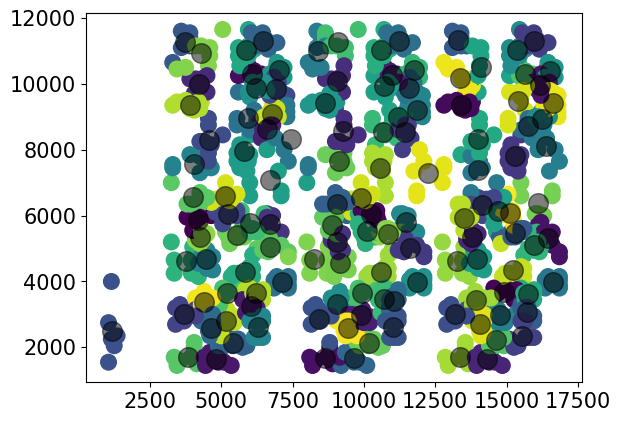

time = 0.2233 seconds


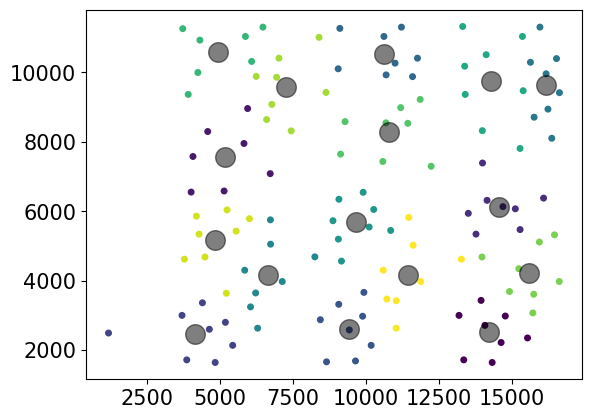

time = 0.0156 seconds


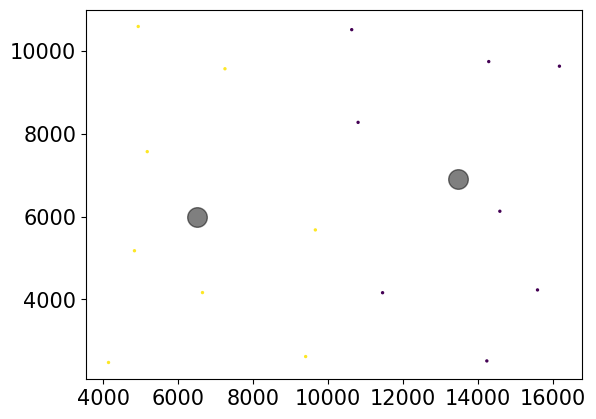

'\nfor i in range(len(X_Y)):\n    print(i)\n    print(X_Y[i].shape)\n'

In [108]:
import time   
from k_means_constrained import KMeansConstrained

X_Y=[X_Y]
KM_labels = []

Constrained_KMeans = True

if Constrained_KMeans:
    for i in range(n_hierarchies):
        #print(i, n_clusters[i])
        tic = time.perf_counter()
        KMC = KMeansConstrained(
            n_clusters = n_clusters[i],
            size_min = cluster_size_min,
            size_max = n_problems,
            random_state = 0)
        y_KMC = KMC.fit_predict(X_Y[i])
        centers = KMC.cluster_centers_
        toc = time.perf_counter()
        print(f"time = {toc-tic:0.4f} seconds")
        plt.scatter(X_Y[i][:,0], X_Y[i][:,1], c=y_KMC, s=n_clusters[i], cmap='viridis')
        KM_labels.append(y_KMC)
        X_Y.append(centers)
        plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
        plt.rcParams.update({'font.size':15})
        plt.show()
else :
    for i in range(n_hierarchies):
        tic = time.perf_counter()
        kmeanModel = KMeans(n_clusters[i], init='k-means++').fit(X_Y[i])
        toc = time.perf_counter()
        print(f"time = {toc-tic:0.4f} seconds")
        kmeanModel.fit(X_Y[i])
        y_kmeans = kmeanModel.predict(X_Y[i])
        plt.scatter(X_Y[i][:,0], X_Y[i][:,1], c=y_kmeans, s=50, cmap='viridis')
        centers = kmeanModel.cluster_centers_
        #print(kmeanModel.cluster_centers_)
        #print(kmeanModel.labels_)
        KM_labels.append(kmeanModel.labels_)
        X_Y.append(centers)
        plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
        plt.rcParams.update({'font.size':15})
        plt.show()

    for i in range(len(X_Y)):
        print(i)
        print(X_Y[i].shape)
"""
for i in range(len(X_Y)):
    print(i)
    print(X_Y[i].shape)
"""        

In [109]:
## sys2_cities has [hierarchies where the sub-cluster belongs, Center X/Y coordinates of the sub-cluster, Cities X/Y coordinates in the sub-cluster]
## sys2_centers has [hierarchies where the sub-cluster belongs, Center X/Y coordinates of the sub-cluster]
## sys2_clusters has [hierarchies where the sub-cluster belongs, Cities X/Y coordinates in the sub-cluster]
sys2_centers = []
sys2_clusters = []

H = range(0,n_hierarchies)
for h in H:
    K = range(0,n_clusters[h])
    sys2_centers.append([])
    sys2_clusters.append([])
    colors = mpl.cm.tab20(range(20))
    for k in K:
        sys2_centers[h].append(X_Y[h+1][k])
        sys2_clusters[h].append(X_Y[h][get_clustered_cities(k, KM_labels[h])])
    largest_cluster_size = n_problems
    smallest_cluster_size = n_problems
    for k in K:
        if len(sys2_clusters[h][k]) > largest_cluster_size:
            largest_cluster_size = len(sys2_clusters[h][k])
        if len(sys2_clusters[h][k]) < smallest_cluster_size:
            smallest_cluster_size = len(sys2_clusters[h][k])
        if (len(sys2_clusters[h][k]) == 1):
            print("dirty cluster")
    print("The largest & smallest cluster size in Hierarchy ",h+1, ": ", largest_cluster_size, " & ", smallest_cluster_size)
## Add the topmost cluster
sys2_centers.append([])
sys2_clusters.append([])
sys2_centers[-1].append([0, 0])
sys2_clusters[-1].append(X_Y[-1])

The largest & smallest cluster size in Hierarchy  1 :  8  &  6
The largest & smallest cluster size in Hierarchy  2 :  8  &  7
The largest & smallest cluster size in Hierarchy  3 :  8  &  8


In [110]:
def gen_sys2_sol(MAC_ising, benchmark, sys2_centers, sys2_clusters):
    if MAC_ising:
        cpp_cmd = "./ising_mac"
    else :
        cpp_cmd = "./ising_RNG"
    
    sol_route = []
    total_traveling_distance = 0
    timet =[]
    os.system("rm -rf sys2clusters_" + str(benchmark))
    SYS2_CENTERS = sys2_centers
    SYS2_CLUSTERS = sys2_clusters
    
    sys2_labels = []
    colors = mpl.cm.tab20(range(20))

    for h in range(0, n_hierarchies+1):
        print("Execute Ising Solver for Hierarchy ", n_hierarchies-h)
        sys2_centers = SYS2_CENTERS[n_hierarchies-h]
        sys2_clusters = SYS2_CLUSTERS[n_hierarchies-h]

        timet.append([])
        ## Find a pair of the closest cities that are in different clusters which will be sequentially visited.
        ## After finding, place each city in the pair in the end of the preceding cluster and the start of the following cluster.
        ## To avoid the city in the following cluster to be selected once again for the next search, the next search starts from Index 1.
        ## Refer to Page 25
        
        if h != 0:
            tree = cKDTree(sys2_centers)
            clust_id_list = []
            for k in range(len(sol_route)-1):
                clust_idx_curr = tree.query(sol_route[k])[1]
                clust_idx_next = tree.query(sol_route[k+1])[1]
                if k ==0:
                    clust_id_list.append(clust_idx_curr)
                clust_id_list.append(clust_idx_next)
                
                curr_clust = sys2_clusters[clust_idx_curr]
                next_clust = sys2_clusters[clust_idx_next]
                tree_clust = cKDTree(next_clust)
                if k ==0:
                    search_init = 0
                else:
                    search_init = 1
                sht_dist = inf
                for inc in range(search_init, len(curr_clust)):
                    val_sd, idx_sd = tree_clust.query(curr_clust[inc])
                    if val_sd < sht_dist:
                        sht_dist = val_sd
                        sht_idx_curr = inc
                        sht_idx_next = idx_sd
                curr_clust[[-1, sht_idx_curr]] = curr_clust[[sht_idx_curr,-1]]
                sys2_clusters[clust_idx_curr] = curr_clust
                next_clust[[0, sht_idx_next]] = next_clust[[sht_idx_next,0]]
                sys2_clusters[clust_idx_next] = next_clust
                if h == n_hierarchies:
                    total_traveling_distance += sht_dist
                    print("hierarchy: ", h, " cluster: ", k, " distance to the next cluster: ", sht_dist, " total distance: ", total_traveling_distance)
            sol_route = []
            route_btw_clusters = []
        else:
            clust_id_list = range(0, len(sys2_centers))
            
        kth = 0
        sys2_labels.append([])
        #for k in range(0, len(sys2_centers)):
        for k in clust_id_list:
            curr_center = sys2_centers[k]
            curr_clust = sys2_clusters[k]
            curr_clust_size = len(curr_clust)
            for l in range(curr_clust_size):
                sys2_labels[h].append(colors[kth%20])
                
            curr_clust_file = [curr_clust_size]
            curr_clust_file.append(curr_clust)
            os.system("mkdir -p sys2clusters_" + str(benchmark))
            curr_filename = str(benchmark) + "_h" + str(n_hierarchies-h)  + "_c" + str(kth) +".in"
            curr_logfile = str(benchmark) + "_h" + str(n_hierarchies-h)   + "_c" + str(kth) +".out"
            inF = open("sys2clusters_" + str(benchmark) + "/" + curr_filename,"w")
            inF.write(str(curr_clust_size))
            inF.write("\n")
            for i in curr_clust:
                inF.write(str(i[0]) + " " + str(i[1]))
                inF.write("\n")      
            inF.close()
            
    #        outF = open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"w")
            
            for i in range(0,1):
    #            outF.write("pass " + str(i+1) + "\n")
                tic = time.perf_counter()
                ### when h>0, Problem_size to optimize = N-1 when k is 0 or -1, otherwise N-2
                if h == 0 :
                    os.system(cpp_cmd+" k0" + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                elif kth == len(sys2_centers)-1:
                    os.system(cpp_cmd+" k-1" + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                else :
                    os.system(cpp_cmd+" k" + str(kth+1) + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                toc = time.perf_counter()
                timet[-1].append(toc-tic)
            
    #            print(f"time = {toc-tic:0.4f} seconds")
            dist_array =[]
            sol =[]
            with open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"r") as outFile:
                lines = outFile.readlines()
                
                for i in range(0,len(lines)):
                    line = lines[i]
                    if "dist" in line:
                        dist_array.append(line.strip().split()[1])
                        continue
                dist = min(dist_array)
                ####################################
                ####################################
                ####################################
                if h == n_hierarchies:
                    print("hierarchy: ", h, " cluster: ", kth, " distance to the next cluster: ", float(dist), " total distance: ", total_traveling_distance)
                    total_traveling_distance += float(dist)
                ####################################
                ####################################
                ####################################
                for i in range(0, curr_clust_size):
                    line = lines[i]
                    """
                    if "seq_clust" in line:
                        continue
                    if "dist" in line:
                        continue
                    if "size():" in line:
                        continue
                    if "final" in line:
                        continue
                    if "remapped" in line:
                        continue
                    """
                    curr = line.strip().split()
                    for j in range(len(curr)):
                        curr[j] = float(curr[j])
                    sol_route.append(curr)
                
                    if h == n_hierarchies:
                        if (i == 0) or (i == curr_clust_size-1):
                            route_btw_clusters.append(curr)
                
                outFile.close()
            print("done with cluster" + str(k)+ " ("+str(kth)+"th)")
            kth += 1
        print("Ising Max time = " + str(max(timet[-1])))
        print("Ising Min time = " + str(min(timet[-1])))
        #print("Ising Total time = " + str(sum(timet[-1])))
    
    print("total_traveling_distance: ", total_traveling_distance)
    return sol_route, route_btw_clusters, sys2_labels

In [111]:
print(n_clusters)
sol_route, route_btw_clusters, sys2_labels = gen_sys2_sol(MAC_ising, x, sys2_centers, sys2_clusters)

[126, 16, 2]
Execute Ising Solver for Hierarchy  3
done with cluster0 (0th)
Ising Max time = 0.021859682979993522
Ising Min time = 0.021859682979993522
Execute Ising Solver for Hierarchy  2
done with cluster1 (0th)
done with cluster0 (1th)
Ising Max time = 0.25282946694642305
Ising Min time = 0.2498395419679582
Execute Ising Solver for Hierarchy  1
done with cluster13 (0th)
done with cluster10 (1th)
done with cluster1 (2th)
done with cluster14 (3th)
done with cluster3 (4th)
done with cluster7 (5th)
done with cluster4 (6th)
done with cluster8 (7th)
done with cluster15 (8th)
done with cluster11 (9th)
done with cluster5 (10th)
done with cluster9 (11th)
done with cluster6 (12th)
done with cluster2 (13th)
done with cluster0 (14th)
done with cluster12 (15th)
Ising Max time = 0.26560347410850227
Ising Min time = 0.1357522039907053
Execute Ising Solver for Hierarchy  0
hierarchy:  3  cluster:  0  distance to the next cluster:  854.4003745317531  total distance:  854.4003745317531
hierarchy:  3

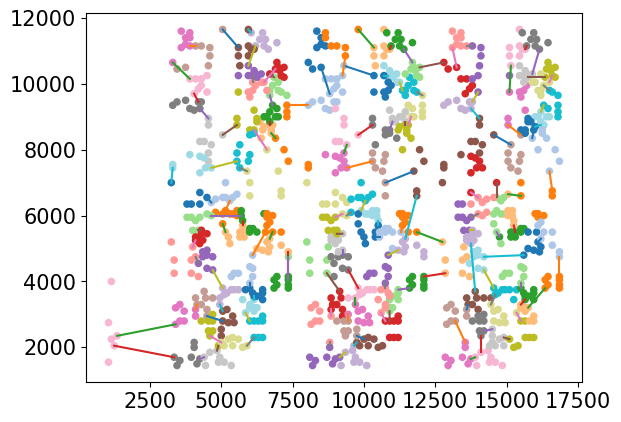

In [112]:
route = np.array(route_btw_clusters)
sol_route = np.array(sol_route)
for n in range(int(len(route_btw_clusters)/2)-1):
    plt.plot(route[2*n+1:2*(n+1)+1,0], route[2*n+1:2*(n+1)+1,1], '-')
plt.scatter(sol_route[:,0], sol_route[:,1], c=sys2_labels[n_hierarchies][:], s=20)
plt.show()

In [113]:
from math import sin, cos, sqrt, atan2, radians
def compute_geo(p1,p2):
    R = 6373.0
    
    lat1 = radians(float(p1[0]))
    lon1 = radians(float(p1[1]))
    lat2 = radians(float(p2[0]))
    lon2 = radians(float(p2[1]))
    
    dlon = lon2 - lon1
    dlat = lat2 -lat1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    dist = R*c
    return dist

In [114]:
coord_geo == False
if coord_geo == True:
#     test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
    for i in range(len(test)):
        print(i)
        for j in range(len(test[i])):
            geo_dist = 0
            li = test[i][j][1]
            for idx,elem in enumerate(li):
                thiscity = elem
                nextcity = li[(idx+1)%len(li)]
                geo_dist += compute_geo(thiscity, nextcity)
            test[i][j][2] = geo_dist 
            print(geo_dist)
        np.save("sys2clusters_" + str(x) + "/sol_table" ,test)    


mport pdb; pdb.set_trace()     

In [115]:
## Sangmin edited

print(X_coord.shape)
print(Y_coord.shape)
print(x)
with open("tsp" + x + "_pyconcorde.txt", "w") as f:
    solver = TSPSolver.from_data(X_coord, Y_coord, norm="EUC_2D")  
    solution = solver.solve()
    f.write( str(" ") + str('output') + str(" ") )
    f.write( str("solution found? ") + str(solution.found_tour) + str(" ") )
    f.write( str("Optimal value? ") + str(solution.optimal_value) + str(" ") )
    f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
    f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )

(1001,)
(1001,)
pr1002
Problem Name: e9618109051c4e5e95b0461ff29c29be
Problem Type: TSP
Number of Nodes: 1001
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 304860
   0 Steps   Best: 263521   0.01 seconds
   2 Steps   Best: 263455   0.01 seconds
   3 Steps   Best: 263423   0.01 seconds
   6 Steps   Best: 262935   0.01 seconds
   7 Steps   Best: 262928   0.01 seconds
  10 Steps   Best: 262839   0.01 seconds
  11 Steps   Best: 262622   0.01 seconds
  13 Steps   Best: 262548   0.01 seconds
  14 Steps   Best: 262418   0.01 seconds
  15 Steps   Best: 262373   0.01 seconds
  17 Steps   Best: 261715   0.01 seconds
  19 Steps   Best: 261708   0.02 seconds
  20 Steps   Best: 261685   0.02 seconds
  24 Steps   Best: 261106   0.02 seconds
  29 Steps   Best: 260695   0.02 seconds
  34 Steps   Best: 260651   0.02 seconds
  39 Steps   Best: 260642   0.02 seconds
  43 Steps   Best: 260437   0.02 seconds
  46 Steps   Best: 

In [116]:
GO = False
if GO:
    num_samples = 10000
    set_nodes_coord = np.random.random([num_samples, n_clusters, 2])
    with open("tsp" + str(n_clusters) + "_pr1002.txt", "w") as f:
        solver = TSPSolver.from_data(centers[:,0], centers[:,1], norm="EUC_2D")  
        solution = solver.solve()
        f.write( " ".join( str(x)+str(" ")+str(y) for x,y in centers) )
        f.write( str(" ") + str('output') + str(" ") )
        f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
        f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )
        